# B"H

---


## Regression Plots
---

In [1]:
import os
import sys

# Import the regular expression module
import re

import numpy as np

import pandas as pd
from scipy.stats import zscore

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Prior size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

Prior size: [6.0, 4.0]
Current size: [12, 9]


In [3]:
# -- -----------------------------------------------------------------
PROJ_ROOT = '../..'

print("------------------------------")
print("          PROJ_ROOT           ")
print(os.path.abspath(PROJ_ROOT))
print("------------------------------")
print(" ")
# -- -----------------------------------------------------------------



# -- -----------------------------------------------------------------
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(PROJ_ROOT, 'src')
sys.path.append(src_dir)


print("------------------------------")
print("           src_dir            ")
print(os.path.abspath(src_dir))
print("------------------------------")
print(" ")
# -- -----------------------------------------------------------------



# -- -----------------------------------------------------------------
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# import my method from the source code
%aimport helper_functions
import helper_functions as hf
# -- -----------------------------------------------------------------

------------------------------
          PROJ_ROOT           
/home/baruch/repos/coding_deep_dive/env-python-learn
------------------------------
 
------------------------------
           src_dir            
/home/baruch/repos/coding_deep_dive/env-python-learn/src
------------------------------
 


---

### Import Data

In [4]:
auto = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'auto-mpg.csv'    
)


auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,red,27.370336,o
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,green,62.199511,o
2,36.1,4,91.0,60,1800,16.4,78,Asia,honda civic cvcc,blue,9.000000,x
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,red,34.515625,o
4,34.3,4,97.0,78,2188,15.8,80,Europe,audi 4000,blue,13.298178,s


In [5]:
hp  = auto['hp'].values
mpg = auto['mpg'].values

---
### Simple linear regressions

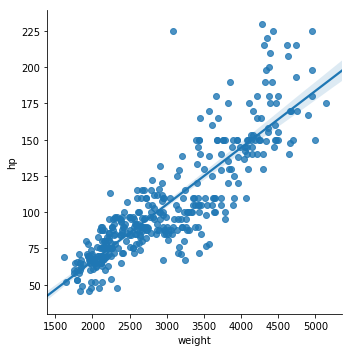

In [13]:
# Plot a linear regression between 'weight' and 'hp'

sns.lmplot(
    x    = 'weight', 
    y    = 'hp', 
    data = auto
)



plt.show()

---
### Plotting residuals of a regression

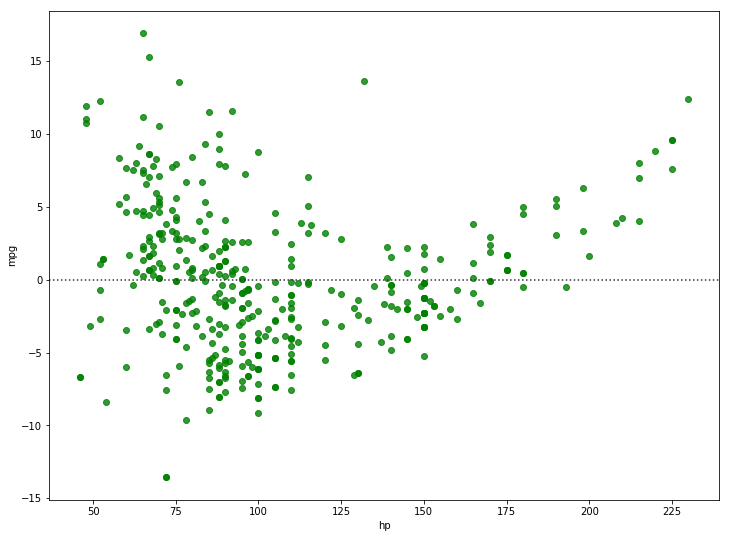

In [14]:
# Generate a green residual plot of the regression between 'hp' and 'mpg'

sns.residplot(
    x     = 'hp', 
    y     = 'mpg', 
    data  = auto, 
    color = 'green'
)



plt.show()

--- 
### Higher-order regressions
- When there are more complex relationships between two variables, a simple first order regression is often not sufficient to accurately capture the relationship between the variables. 
- Seaborn makes it simple to compute and visualize regressions of varying orders.

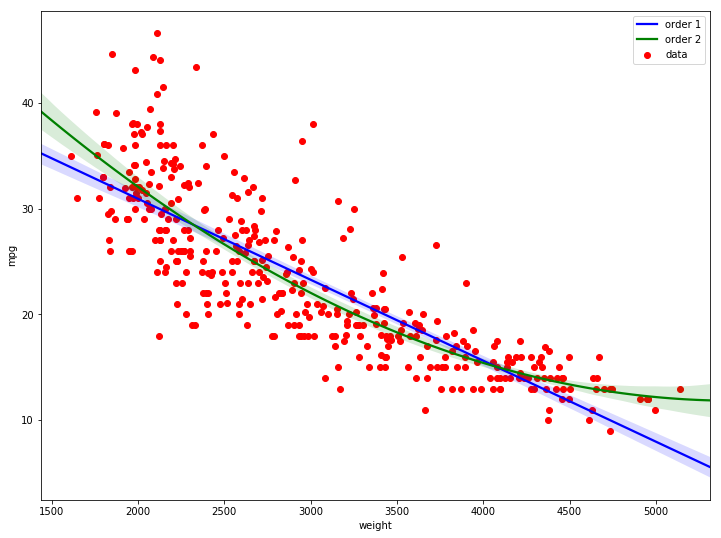

In [8]:
# -- --------------------------------------------------
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(
    x      = auto['weight'], 
    y      = auto['mpg'], 
    label  = 'data', 
    color  = 'red', 
    marker = 'o'
)
# -- --------------------------------------------------


# -- --------------------------------------------------
# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(
    x       = 'weight', 
    y       = 'mpg', 
    data    = auto, 
    label   = 'order 1', 
    color   = 'blue', 
    scatter = None, 
    order   = 1
)
# -- --------------------------------------------------


# -- --------------------------------------------------
# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(
    x       = 'weight', 
    y       = 'mpg', 
    data    = auto, 
    label   = 'order 2', 
    color   = 'green', 
    scatter = None, 
    order   = 2
)
# -- --------------------------------------------------


# -- --------------------------------------------------
# Add a legend and display the plot
plt.legend(loc='upper right')
plt.show()
# -- --------------------------------------------------

#### Cool! It seems like a regression of order 2 is necessary to properly capture the relationship between 'weight' and 'mpg'.

---
### Grouping linear regressions by hue

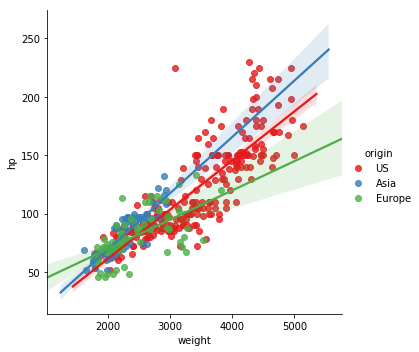

In [16]:
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot(
    x       = 'weight',
    y       = 'hp',
    data    = auto,
    hue     ='origin',
    palette = 'Set1'
)

# Display the plot
plt.show()

---
### Grouping linear regressions by row or column

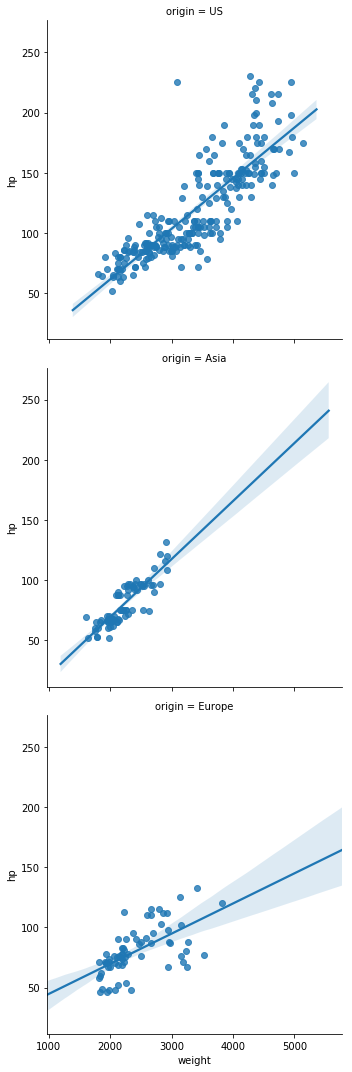

In [17]:
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot(
    x       = 'weight',
    y       = 'hp',
    data    = auto,
    row     = 'origin',
    palette = 'Set1'
)

# Display the plot
plt.show()


#### Cool! It is easier to make sense of the three regression lines now that they each have their own subplot.